# Brianne Bell

# ADS 509 Sentiment Assignment
## February 20, 2023

This notebook holds the Sentiment Assignment for Module 6 in ADS 509, Applied Text Mining. Work through this notebook, writing code and answering questions where required. 

In a previous assignment you put together Twitter data and lyrics data on two artists. In this assignment we apply sentiment analysis to those data sets. If, for some reason, you did not complete that previous assignment, data to use for this assignment can be found in the assignment materials section of Blackboard. 


## General Assignment Instructions

These instructions are included in every assignment, to remind you of the coding standards for the class. Feel free to delete this cell after reading it. 

One sign of mature code is conforming to a style guide. We recommend the [Google Python Style Guide](https://google.github.io/styleguide/pyguide.html). If you use a different style guide, please include a cell with a link. 

Your code should be relatively easy-to-read, sensibly commented, and clean. Writing code is a messy process, so please be sure to edit your final submission. Remove any cells that are not needed or parts of cells that contain unnecessary code. Remove inessential `import` statements and make sure that all such statements are moved into the designated cell. 

Make use of non-code cells for written commentary. These cells should be grammatical and clearly written. In some of these cells you will have questions to answer. The questions will be marked by a "Q:" and will have a corresponding "A:" spot for you. *Make sure to answer every question marked with a `Q:` for full credit.* 


In [11]:
import os
import re
import emoji
import pandas as pd
import numpy as np

from collections import Counter, defaultdict
from string import punctuation

from nltk.corpus import stopwords

sw = stopwords.words("english")

In [101]:
# Add any additional import statements you need here
from nltk.tokenize import word_tokenize

#Albrecht, Jens; Ramachandran, Sidharth; Winkler, Christian. Blueprints for Text Analytics Using Python (p. 302). O'Reilly Media. Kindle Edition. 
import nltk
nltk.download('punkt')
import seaborn as sns

[nltk_data] Downloading package punkt to C:\Users\breel.B-E-
[nltk_data]     BELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [9]:
# change `data_location` to the location of the folder on your machine.
data_location = "C:/Users/breel.B-E-BELL/OneDrive/Documents/GitHub/ADS-509-textmine_M6-sentiment/"

# These subfolders should still work if you correctly stored the 
# data from the Module 1 assignment
twitter_folder = "twitter/"
lyrics_folder = "lyrics/"

positive_words_file = "positive-words.txt"
negative_words_file = "negative-words.txt"
tidy_text_file = "tidytext_sentiments.txt"

artist_files = {'cher':'cher_followers_data.txt',
                'robyn':'robynkonichiwa_followers_data.txt'}

## Data Input

Now read in each of the corpora. For the lyrics data, it may be convenient to store the entire contents of the file to make it easier to inspect the titles individually, as you'll do in the last part of the assignment. In the solution, I stored the lyrics data in a dictionary with two dimensions of keys: artist and song. The value was the file contents. A Pandas data frame would work equally well. 

For the Twitter data, we only need the description field for this assignment. Feel free all the descriptions read it into a data structure. In the solution, I stored the descriptions as a dictionary of lists, with the key being the artist. 




In [81]:
# Read in the lyrics data
#initializing lists
artists = []
title = []
lyrics = []

path = data_location + lyrics_folder
# looping through the files
for artist in os.listdir(path):
    artist_name = os.path.join(path, artist)
    
    for file in os.listdir(artist_name):
        filename = os.path.join(path, artist, file)
        
        with open(filename) as infile:
            #songs = infile.read().replace('\n', ' ') # remove \n
            songs = infile.read()
            #songs.replace('\n', '')
            song_text = re.split(r'\s{3,}', songs) # making it so title can be separate from lyrics
        artists.append(artist)
        title.append(song_text[0])
        lyrics.append(''.join(song_text[1]))
        
        
lyrics_data = pd.DataFrame({'artist': artists,
                         'title': title,
                         'lyrics':lyrics})

#checking
lyrics_data.sample(10)

,artist,title,lyrics
10,cher,"""Angels Running""",Well I heard enough \nAnd I've seen enough\nAn...
33,cher,"""Chastity Sun""","Chastity Sun, you are the one\nThat can make m..."
282,cher,"""Walls""",Never thought that I would end up like this\nB...
71,cher,"""Fernando""","Can you hear the drums, Fernando?\nI remember,..."
393,robyn,"""O Baby""",[Chorus:]\nO baby you're making that mistake a...
249,cher,"""The Fall (Kurt's Blues)""",Never even knew you\nBut I heard your note tod...
9,cher,"""Am I Blue?""","Am I blue, ah am I blue\nAin't these tears\nIn..."
108,cher,"""I Found You Love""","Well I was looking for a new love, a different..."
228,cher,"""Song Called Children""","Children playing in a park with a ball, teddy ..."
102,cher,"""I Don't Have To Sleep To Dream""",I gave up the fight for love\nWalked away to c...


In [10]:
# Read in the twitter data
twitter_data = pd.read_csv(data_location + twitter_folder + artist_files['cher'],
                           sep="\t",
                           quoting=3)

twitter_data['artist'] = "cher"

twitter_data_2 = pd.read_csv(data_location + twitter_folder + artist_files['robyn'],
                             sep="\t",
                             quoting=3)
twitter_data_2['artist'] = "robyn"

twitter_data = pd.concat([
    twitter_data,twitter_data_2])
    
del(twitter_data_2)
# checking
twitter_data.sample(10)


,screen_name,name,id,location,followers_count,friends_count,description,artist
1268000,MsSoloDolo314,Erin Glockavich,44846541,"St Louis, MO",815,765,"Life goal: To be king undisputed, respected, s...",cher
1918587,jackteejay1,jackteejay,3300289951,tamil nadu.,0,107,"™™,,...☺",cher
128328,OhrnSharon,Sharon Öhrn,2815815774,NaN,1,36,Hellu everybody!. My name is Sharon enjoy my t...,robyn
284673,Roxanna01661175,Roxanna,1203872064337305600,NaN,3,93,NaN,cher
2004772,SocialShelves,SocialBookshelves,716554224,United Kingdom,12005,13747,"Fiction, non-fiction and poetry book reviews f...",cher
3513265,poochy67,mandy williams,86617236,uk kent,26,207,independent free spirit 😀,cher
887845,thornypaw,MissusTeacup,4904684590,USA,0,29,I was once great granny ida may’s,cher
825185,Poletowska,Pol,747885229319168001,NaN,126,2689,"Costeña, me gustan las piedras, amo mucho a Di...",cher
3520834,dchelle94,Devin Michelle,777274604,Tennessee,47,372,Mrs. Knupp 08/10/2013. Mommy to two bright eye...,cher
1363781,GradowiczIwona,Iwona Gradowicz,865612596690341889,NaN,1,89,NaN,cher


In [14]:
# only need the description column so making a dataframe of just that and artist:
twitter = twitter_data[['description', 'artist']].copy()

# dropping blank (NaN) from description
twitter = twitter.dropna()
# checking
twitter.sample(10)

,description,artist
707573,"If you side with Putin, move to Russia. You wo...",cher
3855146,"whatsApp buena onda, bueno conoceme =) :P",cher
136391,"anthropologist, freelance writer, contributor ...",robyn
882666,I love Alaska and Dwight Yoakam and mermaids a...,cher
579741,Fun to be with,cher
3218076,never change who you are cause the best of peo...,cher
575551,Premium Brand in high end Laser Lighting techn...,cher
1030646,Drag acc - @peachy_kween_💜,cher
3134761,#Belieber :3 Violetta Forever *_* ♡ Frozen ♡,cher
2253121,"I'm a creative, talented, and artistic type of...",cher


In [25]:
# Reading in the negative file (tab separated is \t not /t):
tidytext = pd.read_csv(data_location + "tidytext_sentiments.txt", sep = "\t")

# adding in score column to match others:
tidytext.loc[tidytext['sentiment'].isin(['negative']), 'score'] = -1
tidytext.loc[tidytext['sentiment'].isin(['positive']), 'score'] = +1

# checking
tidytext.head(5)

,word,sentiment,lexicon,score
0,abandon,negative,nrc,-1.0
1,abandoned,negative,nrc,-1.0
2,abandonment,negative,nrc,-1.0
3,abba,positive,nrc,1.0
4,abduction,negative,nrc,-1.0


In [20]:
# Reading in the negative file:
    # to match the tidytext format, will put in columns:
        # of "word", "sentiment", "lexicon", and "score"
        # 'score' if for the scoring of +1 positive or -1 for negative
        
negative = pd.read_csv(data_location + "negative-words.txt", names=['word'], skiprows= 34)
# adding in other columns for matching/consistency:
negative['sentiment'] = 'negative'
negative['lexicon'] = '' # blank since no info
negative['score'] = -1

# checking
negative.head(5)

,word,sentiment,lexicon,score
0,2-faced,negative,,-1
1,2-faces,negative,,-1
2,abnormal,negative,,-1
3,abolish,negative,,-1
4,abominable,negative,,-1


In [21]:
# Reading in the positive file:
    # to match the tidytext format, will put in columns:
        # of "word", "sentiment", "lexicon", and "score"
        # 'score' if for the scoring of +1 positive or -1 for negative
        
positive = pd.read_csv(data_location + "positive-words.txt", names=['word'], skiprows= 34)
# adding in other columns for matching/consistency:
positive['sentiment'] = 'positive'
positive['lexicon'] = '' # blank since no info
positive['score'] = +1

# checking
positive.head(5)

,word,sentiment,lexicon,score
0,a+,positive,,1
1,abound,positive,,1
2,abounds,positive,,1
3,abundance,positive,,1
4,abundant,positive,,1


In [27]:
# combining the three files into one dataframe
word_score = pd.concat([tidytext, positive, negative], ignore_index= True)

#checking:
word_score.sample(10)

,word,sentiment,lexicon,score
19441,incorrect,negative,,-1.0
15854,fervently,positive,,1.0
19379,inadequate,negative,,-1.0
7212,disbeliever,negative,bing,-1.0
8740,immature,negative,bing,-1.0
19094,hardheaded,negative,,-1.0
12883,defacement,negative,loughran,-1.0
19987,merciless,negative,,-1.0
12319,willing,positive,bing,1.0
14569,underproduced,negative,loughran,-1.0


## Sentiment Analysis on Songs

In this section, score the sentiment for all the songs for both artists in your data set. Score the sentiment by manually calculating the sentiment using the combined lexicons provided in this repository. 

After you have calculated these sentiments, answer the questions at the end of this section.


In [88]:
# your code here

# setting things up
pos_score = 1
neg_score = -1
word_dict = word_score.set_index('word').to_dict()['score']

# function for bing_liu_score as made in Chapter 11 of the book
    # Albrecht, Jens; Ramachandran, Sidharth; Winkler, Christian. 
    # Blueprints for Text Analytics Using Python (p. 303). 
    # O'Reilly Media. Kindle Edition. 
def bing_liu_score(text):
    sentiment_score = 0 # start fresh at neutral 0
    bag_of_words = word_tokenize(text.lower()) # tokenize lowercase words
    
    for word in bag_of_words:
        if word in word_dict:
            sentiment_score += word_dict[word]
    
    return round(sentiment_score/len(bag_of_words),4)

In [89]:
# running the function on the lyrics portion of lyrics data
lyrics_data['Bing_Liu_Score'] = lyrics_data['lyrics'].apply(bing_liu_score)
lyrics_data.sample(10)

,artist,title,lyrics,Bing_Liu_Score
387,robyn,"""Moonlight""","Oh baby no, don't you go, let them wait\nOh ba...",0.0305
111,cher,"""I Got You Babe""",[Her:]\nThey say we're young and we don't know...,0.0172
318,robyn,"""Anytime You Like""",It's like you're waiting for me to start\nTher...,-0.0255
382,robyn,"""Love Kills""",If you're looking for love\nGet a heart made o...,-0.0502
222,cher,"""Silver Wings & Golden Rings""",It was Friday night \nAnd both of us were lone...,0.0357
230,cher,"""SOS""","Where are those happy days, they seem so hard ...",0.0419
371,robyn,"""In My Heart""",Hope things will get better 'cause that's what...,0.0345
269,cher,"""The Way Of Love""",When you meet a boy\nThat you like a lot\nAnd ...,0.0476
36,cher,"""Classified 1A""",I know now how much I love you\nI knew it sure...,0.0178
187,cher,"""Not Enough Love in The World""",Sometimes I wonder where it is loves goes\nI d...,0.0719


In [90]:
# looking at average sentiment score for each artist to see who is higher/lower:
lyrics_data.groupby(['artist']).Bing_Liu_Score.agg('describe')[['min', 'max', 'mean']]
    # included min and max out of curisosity

,min,max,mean
artist,,,
cher,-0.2456,0.2217,0.026662
robyn,-0.1968,0.2407,0.029500


### Questions

**Q:** Overall, which artist has the higher average sentiment per song? 

**A:** Robyn barely has a higher average sentiment at .0295, compared to Cher's .0267.

---



**Q:** For your first artist, what are the three songs that have the highest and lowest sentiments? Print the lyrics of those songs to the screen. What do you think is driving the sentiment score? 

**A:** The first artist is Cher and her top three songs of highest sentiment are: 'My Love' (.222), 'Sing for Your Supper' (.211), 'Will You Love Me Tomorrow' (.192). Her top three songs for lowest sentiment are: 'Bang-Bang' (-.246), 'There But For Forturne' (-.235), 'Bang Bang (My Baby Shot Me Down)' (-.182). I think the words driving the positive scores are 'love', 'good', 'sweet' since they appear often these songs. The top negative sentiment songs have a high presence of words like 'prison', 'jail', 'stale', and 'awful' which are all negative rated words based on the lexicons we are using.  

---

Finding top three highest and lowest sentiment songs for Cher:

In [91]:
# getting cher lyric data by itself
cher_lyr_sent = lyrics_data[lyrics_data['artist']== 'cher']

# finding top three highest sentiment scores:
cher_lyr_sent.sort_values('Bing_Liu_Score', ascending = False).head(3)
    # 'My Love' (.222), 'Sing for Your Supper' (.211), 'Will You Love Me Tomorrow' (.192)

,artist,title,lyrics,Bing_Liu_Score
181,cher,"""My Love""",When I go away\nI know my heart can stay with ...,0.2217
223,cher,"""Sing For Your Supper""",Sing for your supper \nAnd you'll get breakfas...,0.2105
301,cher,"""Will You Love Me Tomorrow""",Tonight you're mine completely \nYou give your...,0.1923


In [92]:
# finding top three lowest sentiment scores:
cher_lyr_sent.sort_values('Bing_Liu_Score', ascending = True).head(3)
    # 'Bang-Bang' (-.246), 'There But For Forturne' (-.235), 'Bang Bang (My Baby Shot Me Down)' (-.182)

,artist,title,lyrics,Bing_Liu_Score
16,cher,"""Bang-Bang""",Bang bang you shot me down\nBang bang I hit th...,-0.2456
261,cher,"""There But For Fortune""",Show me the prison \nShow me the jail \nShow m...,-0.2353
17,cher,"""Bang Bang (My Baby Shot Me Down)""",I was five and he was six\nWe rode on horses m...,-0.1823


In [94]:
# printing lyrics via function to save space adn time from writing out same line of code 12 times:

def top_pos_neg(df, artist, largest = True, n=3): 
    # ^ need df, artist, largest=True is for highest Bing_Liu_Score, n=3 is because we want 3
    if largest is True:
        # storing in temperary df the artist and n largest Bing_Liu_Scores
        temp_df = df.loc[df['artist'].isin([artist])].nlargest(n, 'Bing_Liu_Score')
    else:
        # storing in temperary df the artist and n smallest Bing_Liu_Scores
        temp_df = df.loc[df['artist'].isin([artist])].nsmallest(n, 'Bing_Liu_Score')
    # getting lyrics to print out:
    for index, row in temp_df.iterrows():
        print('-'*20) #prints - 20 times
        print('Artist: ', row['artist']) #prints artist
        print('Title: ', row['title'])
        print('Bing Liu Score: ', row['Bing_Liu_Score'])
        print('-'*20)
        print(row['lyrics'])
        print('\n', '-'*30, '\n')

In [95]:
# calling function for Cher's top 3 positive score songs:
top_pos_neg(lyrics_data, artist= 'cher', largest= True, n= 3)
    # I am unsure why I am only getting the first verse of the 2nd and 3rd songs when the full set of lyrics is in the file.

--------------------
Artist:  cher
Title:  "My Love"
Bing Liu Score:  0.2217
--------------------
When I go away
I know my heart can stay with my love
It's understood
Everywhere with my love
My love does it good, whoa
My love, oh only my love
My love does it good

And when the cupboard's bare
I'll still find something there with my love
It's understood
Everywhere with my love
My love does it so good, whoa
My love, oh only my love
My love does it good

Only my love, oh only my love
Only my love, hold the other things to me
Oh, only my love, oh only my love
Only my love does it good to me

Everywhere with my love
Don't you see my love
It does it so good
Oh, only my love, only my love
My love does it good

Don't ever ask me why
I never say "good-bye" to my love
It's understood
'Cause everywhere with my love
My love does it good, whoa
Only my love, oh only my love
My love does it good

Oh only my love
Only my love does it good to me,whoa


 ------------------------------ 

----------------

In [96]:
# calling function for Cher's top 3 negative score songs:
top_pos_neg(lyrics_data, artist= 'cher', largest= False, n= 3)

--------------------
Artist:  cher
Title:  "Bang-Bang"
Bing Liu Score:  -0.2456
--------------------
Bang bang you shot me down
Bang bang I hit the ground
Bang bang that awful sound
Bang bang my baby shot me down

I was five and you were six
We rode on horses made of sticks
I wore black you wore white
You would always win the fight

Bang bang you shot me down
Bang bang I hit the ground
Bang bang that awful sound
Bang bang my baby shot me down

Seasons came and changed the time
I grew up I called you mine
You would always laugh and say
Remember when we used to play

Bang bang you shot me down
Bang bang and I hit the ground
Bang bang that awful sound
Bang bang my baby shot me down

Music played and people sang
Just for me the church bells rang
After echoes from a gun
We both vowed that we'd be one

Now you're gone I don't know why
Sometimes I cry
You didn't say goodbye
You didn't take the time to lie

Bang bang you shot me down
Bang bang I hit the ground
Bang bang that awful sound
Bang b

**Q:** For your second artist, what are the three songs that have the highest and lowest sentiments? Print the lyrics of those songs to the screen. What do you think is driving the sentiment score? 

**A:** The second artist is Robyn and her top three songs of highest sentiment are: 'Baby Forgive Me' (.241), 'Love Is Free' (.222), 'We Dance To The Beat' (.134). Her top three songs for lowest sentiment are: 'Don't F*cking Tell Me What To Do' (-.197), 'Don't F*cking Tell Me What To Do' (-.197), 'Criminal Intent' (-.100). She had the song 'Don't Fucking Tell Me What To Do' listed twice in her file. The positve sentiment songs have a high prevelence of words like 'brave', 'smile', 'free', 'love', and 'proud' which increases the Bing Liu score. The negative sentiment songs are heavily influenced by words like 'killing' (appears in each and every line of the most negative song),  'f*cking', and 'criminal' and with the high prevelence of these words, the score is decreased drastically. This drastic score difference can be seen from the top two negative scores of -.197 increasing to -.100 when the top two songs have at least one negative word on each line.

---


In [97]:
# getting robyn lyric data by itself
robyn_lyr_sent = lyrics_data[lyrics_data['artist']== 'robyn']

# finding top three highest sentiment scores:
robyn_lyr_sent.sort_values('Bing_Liu_Score', ascending = False).head(3)
    # 'Baby Forgive Me' (.241), 'Love Is Free' (.222), 'We Dance To The Beat' (.134)

,artist,title,lyrics,Bing_Liu_Score
319,robyn,"""Baby Forgive Me""","Here come the night\nIn your eyes\nBaby, be br...",0.2407
380,robyn,"""Love Is Free""","Free\nLove is free, baby\nFree\nLove is free, ...",0.2224
415,robyn,"""We Dance To The Beat""",We dance to the beat\nWe dance to the beat\nWe...,0.1337


In [99]:
# calling function for Robyn's top 3 positive score songs:
top_pos_neg(lyrics_data, artist= 'robyn', largest= True, n= 3)

--------------------
Artist:  robyn
Title:  "Baby Forgive Me"
Bing Liu Score:  0.2407
--------------------
Here come the night
In your eyes
Baby, be brave
Be wise
It's up to you
You do what you like, mmm
Won't you give it a chance, baby?
Just one more try

Baby forgive me
Baby forgive me
Baby forgive me
Baby forgive me

(Won't you give it a chance, baby?)
Won't you give it a chance, baby?
Just one more try
One more try
Yeah, eh

You got the power
You set the price
But baby, be fair
Be nice
You say you want to be happy
Then you got to put your love on the line
Just let me make you smile again, baby
I know we can work it out
Yes, I know we can

Baby forgive me
Yeah
Baby forgive me
Baby forgive me
Baby forgive me
Baby forgive me
Baby forgive me
Baby forgive me
Baby forgive me


 ------------------------------ 

--------------------
Artist:  robyn
Title:  "Love Is Free"
Bing Liu Score:  0.2224
--------------------
Free
Love is free, baby
Free
Love is free, baby
Boom boom boom boom boom chi

In [98]:
# finding top three lowest sentiment scores:
robyn_lyr_sent.sort_values('Bing_Liu_Score', ascending = True).head(3)
    # 'Don't Fucking Tell Me What To Do' (-.197), 'Don't Fucking Tell Me What To Do' (-.197), 'Criminal Intent' (-.100)

,artist,title,lyrics,Bing_Liu_Score
342,robyn,"""Don't Fucking Tell Me What To Do""",My drinking is killing me\nMy drinking is kill...,-0.1968
343,robyn,"""Don't Fucking Tell Me What To Do""",My drinking is killing me\nMy drinking is kill...,-0.1968
334,robyn,"""Criminal Intent""","Somebody alert the authorities, I got criminal...",-0.1000


In [100]:
# calling function for Robyn's top 3 negative score songs:
top_pos_neg(lyrics_data, artist= 'robyn', largest= False, n= 3)

--------------------
Artist:  robyn
Title:  "Don't Fucking Tell Me What To Do"
Bing Liu Score:  -0.1968
--------------------
My drinking is killing me
My drinking is killing me
My drinking is killing me
My drinking is killing me
My drinking is killing me
My drinking is killing me
My drinking is killing me
My drinking is killing me
My drinking is killing me
My drinking is killing me
My drinking is killing me
My drinking is killing me
My drinking is killing me
My drinking is killing me
My drinking is killing me

My smoking is killing me
My diet is killing me
My heels are killing me
My shopping's killing me
My ego is killing me
Can't sleep, it's killing me
My label's killing me
Kickdrum

My phone is killing me
My email is killing me
These hours are killing me
My tour is killing me
This flight is killing me
My manager's killing me
My mother's killing me
My landlord's killing me
My boss is killing me
The TV is killing me
Your nagging is killing me
My boyfriend's killing me
My talking's kill

---

**Q:** Plot the distributions of the sentiment scores for both artists. You can use `seaborn` to plot densities or plot histograms in matplotlib.

**A:** see plot below.

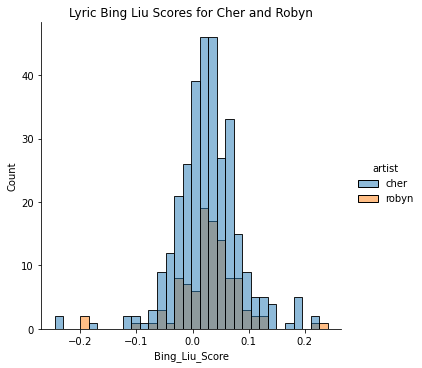

In [105]:
# using seaborn to plot densities of sentiment
sns.displot(lyrics_data, x= 'Bing_Liu_Score', 
            hue= 'artist', fill= True).set(title='Lyric Bing Liu Scores for Cher and Robyn')

## Sentiment Analysis on Twitter Descriptions

In this section, define two sets of emojis you designate as positive and negative. Make sure to have at least 10 emojis per set. You can learn about the most popular emojis on Twitter at [the emojitracker](https://emojitracker.com/). 

Associate your positive emojis with a score of +1, negative with -1. Score the average sentiment of your two artists based on the Twitter descriptions of their followers. The average sentiment can just be the total score divided by number of followers. You do not need to calculate sentiment on non-emoji content for this section.

In [ ]:
# your code here

**Q:** What is the average sentiment of your two artists? 

**A:** <!-- Your answer here --> 

---

**Q:** Which positive emoji is the most popular for each artist? Which negative emoji? 

**A:** <!-- Your answer here --> 

